<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2024/RT_analysis_with_Python_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reaction time (RT) analyses with Python

**Dr. Zhuanghua Shi, 2024**

This tutorial serves as hands-on for the lecture "Psychophysics".


In [4]:
# install satistical package pingouin
!pip install pingouin
#Install PyDDM
!pip -q install git+https://github.com/mwshinn/PyDDM
# install pyreadr for reading rds file from R
!pip install pyreadr
# hide output
from IPython.display import clear_output
clear_output()

In [5]:
# Some prep work to get the data from R and into pandas
# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
# DDM model
import pyddm
import pyddm.plot
import pyreadr

### An Example: Pop-out visual search

This case study presents a complete data set from a visual search experiment conducted by Allenmark et al. (2018). In this experiment, participants discriminated between color and orientation pop-out targets. The following figure illustrates a typical search display featuring an orientation target, which may be tilted to the left or right. For color targets, participants identified either green or red.

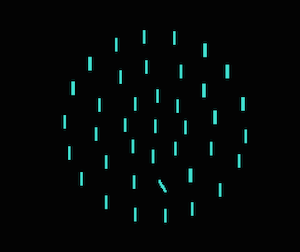

In this experiment, we systematically varied the proportion of color targets versus orientation across three sections: 75% color vs. 25% orientation, 50% color vs. 50% orientation, and 25% color vs. 75% orientation. Participants were tasked with quickly and accurately identifying whether a target was defined by color or orientation, using the left mouse button for color and the right mouse button for orientation. Each trial began with a fixation dot displayed for 700 to 900 ms, followed by the stimulus display that remained visible until participants responded.

The experiment comprised three sections, each containing ten blocks of forty trials. Twelve participants participated in this study; all had normal or corrected-to-normal vision and were unaware of the experiment's purpose. Informed consent was obtained from all participants prior to their involvement.

We aimed to address several research questions:

1. How does the target ratio (color vs. orientation) within a block influence search performance?

2. Does the target ratio interact with the target dimension (color/orientation)?

3. How does a target presented in a previous trial affect detection in the current trial?

## Data structure

All data were pooled together and stored in a R-binary format file (`exp1.rds`).  Experimental data are usually stored in Matlab, excel, or text formats. In the following, we use `urlopen` to download the data to the local, and open it with `pyreadr` package.  


In [19]:
# first get the data to local
from urllib.request import urlopen
url = 'https://github.com/msenselab/ite-bayesian-updating/raw/refs/heads/master/data/exp1.rds'
content = urlopen(url).read()
fhandle = open('exp1.RData', 'wb')
fhandle.write(content)
fhandle.close()
#save content
dat = pyreadr.read_r('exp1.RData')[None]
dat.head()

,target,BlkType,dimension,color,orientation,position,response,rt,rs,blkNo,sub,outlier,error,tno
0,Absent,1:3,Orientation,turg,right,0.0,1.0,1.519519,0.658103,1,aleg,True,False,1
1,Absent,1:3,Orientation,red,left,0.0,1.0,0.743453,1.345075,1,aleg,False,False,2
2,Absent,1:3,Orientation,red,right,0.0,1.0,0.732965,1.364322,1,aleg,False,False,3
3,Absent,1:3,Orientation,red,right,0.0,1.0,0.604829,1.653360,1,aleg,False,False,4
4,Absent,1:3,Orientation,red,right,0.0,1.0,0.615443,1.624845,1,aleg,False,False,5


In most cases behavioural raw data store detailed information, which has more information than we want. Here the most relevant columns we will focus on  are:

1. target: target present vs. absent
2. BlkType: types of block, present:absent ratio of targets
3. rt: reaction time (in seconds)
4. sub: subject number
5. error: error response
6. outlier: outliers based on the RTs and the first trial of each block. You can also calculate outliers yourself.

<span style='color:blue'>__Question:__ What outlier criteria should we set for a normal response time experiment?</span>

## Step 1: Error analysis

### Step 1: Error Analysis


The first step of data analysis is to remove those error trials. However, before doing this, we must make sure there is no speed-accuracy trade-off.

<span style='color:blue'>__Question:__ Why should we care about the speed-accuracy trade-off (SATO)?</span>


Your Answer:

⊳

⊳



<ipython-input-24-c2a799fba674>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat.groupby('sub').error.mean().plot.bar()


<Axes: xlabel='sub'>

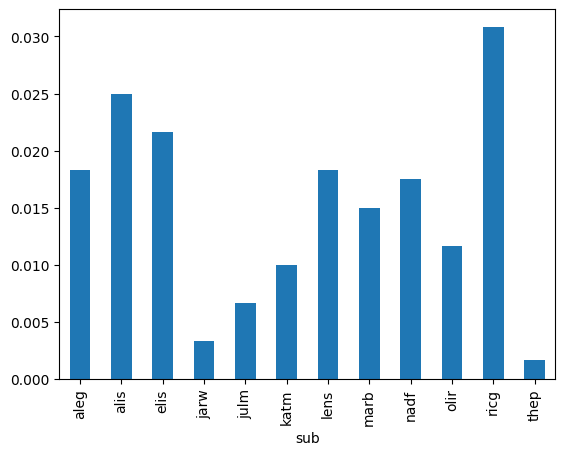

In [24]:
# Your task is to check individual error rates using chaining rules
# Your task: Fixed the code
dat.FIXME.plot.bar()

We then visualize the mean RTs for the error and correct trials.

<ipython-input-29-95ca03dba7d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat.query('outlier == False').groupby(['sub','error']).rt.mean().plot.bar()


<Axes: xlabel='sub,error'>

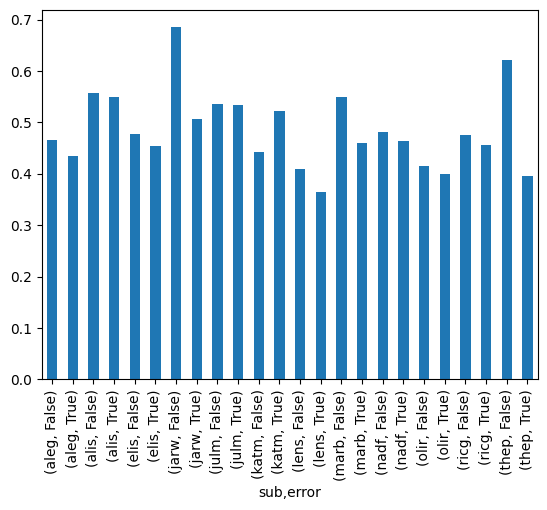

In [29]:
# filter out outliers and quick plot bars for comparison
dat.query('outlier == False').groupby(FIXME).rt.mean().plot.bar()

By visual inspection, the error trials look like to have faster responses. This may indicate certain degree of speed-accuracy trade-off. However, this needs further statistical tests. Note that, if the SATOs occur equally in all conditions, SATOs would not affect our conclusions given that we use within-subject full-factorial design. Thus, it is important to do statistical tests on the RTs, and, if necessary, do error analysis across different experimental conditions.

In [32]:
#use pingouin to compare rt for correct and incorrect trials
pg.rm_anova(data = dat.query('outlier == False'),
            dv = 'FIXME',
            within = 'FIXME',
            subject = 'sub')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,error,1,11,4.139629,0.06672,0.109062,1.0


Based on the above statistical test, we don't need to do SATO correction.

## Step 2. Mean RTs

Given that there is NO SATO, we will remove those error trials for the future analysis. First we calculate mean RT data from the valid trials.

In [37]:
dat.head(2)

,target,BlkType,dimension,color,orientation,position,response,rt,rs,blkNo,sub,outlier,error,tno
0,Absent,1:3,Orientation,turg,right,0.0,1.0,1.519519,0.658103,1,aleg,True,False,1
1,Absent,1:3,Orientation,red,left,0.0,1.0,0.743453,1.345075,1,aleg,False,False,2


In [38]:
# Your task: using chaining rule to exclude outlier and error trials, then average rt for each subject, BlkType, and dimension
vdat = dat.FIXME.rt.mean().reset_index()
vdat.head()

<ipython-input-38-66fd1184619d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vdat = dat.query('outlier == False and error == False').groupby(["sub","BlkType","target"]).rt.mean().reset_index()


,sub,BlkType,target,rt
0,aleg,1:1,Absent,0.460135
1,aleg,1:1,Present,0.495501
2,aleg,1:3,Absent,0.451442
3,aleg,1:3,Present,0.487661
4,aleg,3:1,Absent,0.503201


<Axes: xlabel='BlkType', ylabel='rt'>

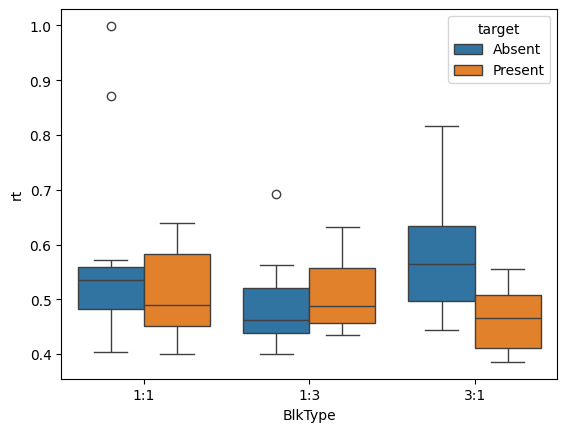

In [39]:
# visualize the RT
sns.boxplot(data = vdat, x = 'FIXME', FIXME, y = 'rt')

We see the target prevance change the mean RT dramatically (e.g., 1:3 vs. 3:1).  

In [40]:
# let's do rmANOVA with within-subject factors BlkType, target on RT
pg.rm_anova(data = vdat, dv = 'rt', within = FIXME, subject = 'sub')

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,BlkType,0.022633,2,22,0.011317,3.262063,0.057453,0.086937,0.031216,0.616802
1,target,0.052033,1,11,0.052033,5.940401,0.032981,0.032981,0.068967,1.000000
2,BlkType * target,0.055251,2,22,0.027625,17.129365,0.000033,0.000563,0.072920,0.635707


The above test reveal a strong interaction between target presence (BlkType) and the target, indicating the decision thresholds were changed according to the target presence/absence ration. In terms of DDM, it is the starting point shifted.

## PyDDM

PyDDM is a simulator and modeling framework for generalized drift-diffusion models (GDDM or DDM).


First, let's gain some intuition about the parameters of the Drift Diffusion Model (DDM) and the shapes of reaction time (RT) distributions.


In [44]:
model = pyddm.gddm(drift="driftrate",
                   noise=1,
                   bound="boundary",
                   starting_position="s0",
                   nondecision = "nondecision",
                   parameters={
                                "nondecision": (0, 0.5),
                               "driftrate": (-1, 3),
                               "boundary": (.5, 1.5),
                               "s0": (-.9, .9)})

pyddm.plot.model_gui_jupyter(model)

Output()

In [87]:
from pyddm import Model
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter, ICPointRatio
from pyddm.functions import display_model
model = Model(name='Simple model',
              drift=DriftConstant(drift=2.2),
              noise=NoiseConstant(noise=1.5),
              bound=BoundConstant(B=1.1),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)
display_model(model)
sol = model.solve()

Model Simple model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.100000



In [111]:
from pyddm import Sample
df_rt = dat.query('outlier == False and BlkType == "1:1" and rt < 4 and target == "Absent"') # we select one condition
df_rt['correct'] = ~df_rt['error']
#create a sample object from the data
rt_sample = Sample.from_pandas_dataframe(df_rt,
                                         rt_column_name = 'rt',
                                         choice_column_name = 'correct')

<ipython-input-111-4afd603416ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['correct'] = ~df_rt['error']


In [112]:
from pyddm import Fittable, Fitted
from pyddm.models import LossRobustBIC
model_fit = Model(name='DDM model',
                  drift=DriftConstant(drift=Fittable(minval=-2, maxval=10)),
                  noise=NoiseConstant(noise=Fittable(minval=.1, maxval=5)),
                  bound=BoundConstant(B=1.1),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=4)

In [113]:
model_fit.fit(rt_sample, fitting_method="differential_evolution",
              lossfunction=LossRobustBIC, verbose=False)

display_model(model_fit)

Info: Params [3.12569039 1.19801102 0.2224839 ] gave -1430.7149407101317
Info:pyddm:Params [3.12569039 1.19801102 0.2224839 ] gave -1430.7149407101317


Model DDM model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 3.125690
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.198011
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.222484
Fit information:
    Loss function: BIC
    Loss function value: -1430.7149407101317
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 3
        - samplesize: 2333
        - mess: ''



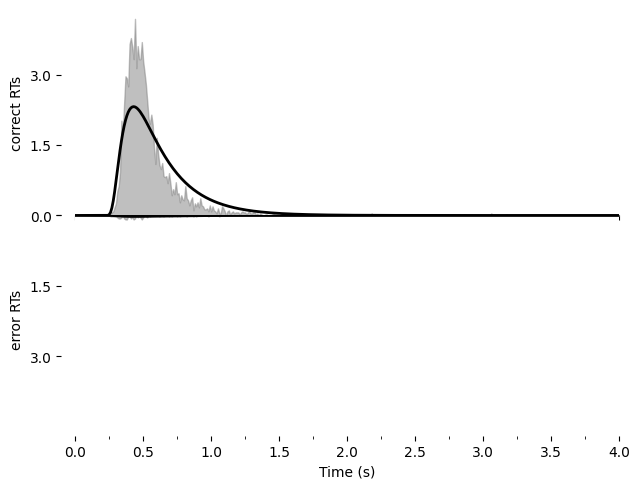

In [107]:
pyddm.plot.plot_fit_diagnostics(model=model_fit, sample=rt_sample)

In [115]:
#let's fit the BlkType 1:1 Target == Present
df_rt = dat.query('outlier == False and BlkType == "1:1" and rt < 4 and target == "Present"') # we select one condition
df_rt['correct'] = ~df_rt['error']
#create a sample object from the data
rt_sample_p = Sample.from_pandas_dataframe(df_rt,
                                         rt_column_name = 'rt',
                                         choice_column_name = 'correct')

<ipython-input-115-9474ea596e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['correct'] = ~df_rt['error']


In [116]:
model_fit.fit(rt_sample_p, fitting_method="differential_evolution",
              lossfunction=LossRobustBIC, verbose=False)

display_model(model_fit)

Info: Params [4.28200187 1.38635184 0.26580278] gave -2921.257481724281
Info:pyddm:Params [4.28200187 1.38635184 0.26580278] gave -2921.257481724281


Model DDM model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 4.282002
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.386352
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.265803
Fit information:
    Loss function: BIC
    Loss function value: -2921.257481724281
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 3
        - samplesize: 2327
        - mess: ''



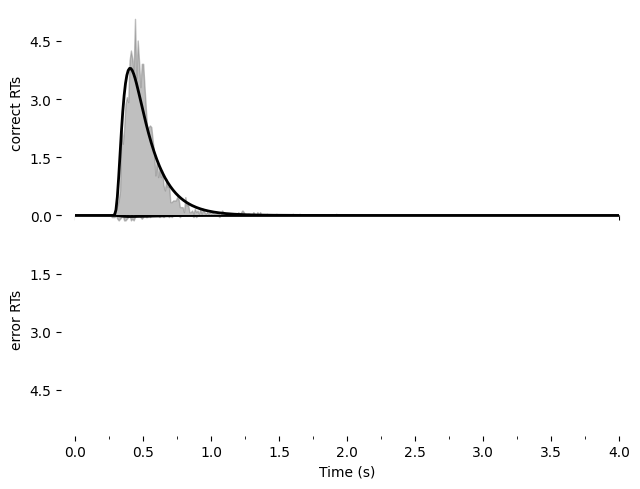

In [117]:
pyddm.plot.plot_fit_diagnostics(model=model_fit, sample=rt_sample_p)

Reflection:

- Compare the parameters and identify the differences.

- What additional steps should we consider for real-world application?


## Further reading

There are several packages are available for fitting reaction times with drift-diffusion models:

- [HDDM](https://hddm.readthedocs.io/en/latest/)
- [pyDDM](https://pyddm.readthedocs.io/)
- [fast-dm](https://www.psychologie.uni-heidelberg.de/projekt/fast-dm/a-very-short-introduction-to-fast-dm/)
